## 1. Import Required Libraries

In [1]:
# Import library for Read file, Analysis data, viz 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore the warning for future package and deprecated package
import warnings
warnings.filterwarnings('ignore')

# import library for Model selection model from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# import the library for classifier model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

# Import the library for test the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Import the library for roc curve
from sklearn.metrics import roc_auc_score, roc_curve

# import the pickle model for save the model
import pickle

## 2. Analysis the Site_BrowingBehavior.csv file

In [2]:
# Read the site_browingbehavior file using pandas
wb = pd.read_csv('Problem2_Site_BrowingBehavior.csv', sep = '\t', header = None)
wb.columns = ['Timestamp', 'UserID', 'Website_section_visited']

In [3]:
wb.head()

,Timestamp,UserID,Website_section_visited
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


In [4]:
# Checking the wb dataframe info and non values
print(wb.info())
print(wb.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5535924 entries, 0 to 5535923
Data columns (total 3 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Timestamp                object
 1   UserID                   int64 
 2   Website_section_visited  object
dtypes: int64(1), object(2)
memory usage: 126.7+ MB
None
Timestamp                  0
UserID                     0
Website_section_visited    0
dtype: int64


### 2.1 Analysis the Site_BrowingBehavior.csv file

In [5]:
# copy the dummy dataframe for analysis 
wb_dummy = wb.copy()

In [6]:
# Add a new column for diff the guest user and registered user
wb_dummy['isGuest'] = wb_dummy['UserID'].apply(lambda g: g <= 0 )

In [7]:
wb_dummy.head()

,Timestamp,UserID,Website_section_visited,isGuest
0,2017-07-26 00:01:40.965,0,product,True
1,2017-07-26 00:03:18.448,0,product,True
2,2017-07-26 00:36:59.028,0,default,True
3,2017-07-26 00:41:17.273,0,product-listing-category,True
4,2017-07-26 00:45:39.197,0,content,True


In [8]:
# Add the new column for analysis the browsing behaviour dataframe
wb_dummy['TimeOfDay'] = wb_dummy['Timestamp'].apply(lambda x:x[11:16])
wb_dummy.sample()

,Timestamp,UserID,Website_section_visited,isGuest,TimeOfDay
2104126,2017-07-26 08:03:35.885,3240712852947980635,product-listing-search,False,08:03


<AxesSubplot:xlabel='TimeOfDay'>

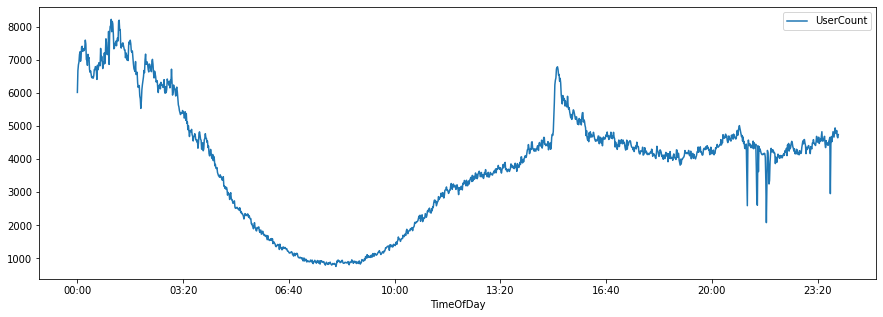

In [9]:
# User visited time with time 
wb_analysis= wb_dummy.groupby('TimeOfDay')['Timestamp'].count().reset_index().rename(columns={'Timestamp': 'UserCount'})
wb_analysis= wb_analysis.sort_values("TimeOfDay")
wb_analysis.plot(x='TimeOfDay',y='UserCount',figsize=(15,5))

### 2.2 Guest User Analysis

In [10]:
# Guest user analysis
print('Total rows & columns : ',wb_dummy.shape)
print('Total users : ', len(wb_dummy.UserID.unique()))

wbuser= pd.DataFrame()
wbuser['count'] = wb_dummy.groupby('isGuest').size()
wbuser['percentile']= wbuser['count'].apply(lambda x:x/len(wb_dummy)*100)
wbuser

Total rows & columns :  (5535924, 5)
Total users :  516932


,count,percentile
isGuest,,
False,4128045,74.568311
True,1407879,25.431689


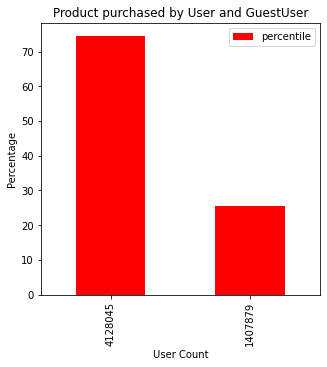

In [11]:
# Guest user plot
wbuser.plot.bar(x='count', y='percentile',figsize=(5,5),color = 'r');
plt.ylabel('Percentage')
plt.xlabel('User Count')
plt.title('Product purchased by User and GuestUser')
plt.show();

### 2.3 Website Visited Analysis

In [12]:
# Registred users are on which product
wb_websiteAnalysis= wb_dummy[wb_dummy['isGuest']==False].groupby('Website_section_visited')['Timestamp'].count().reset_index().rename(columns={'Timestamp': 'UserCount'})
wb_websiteAnalysis['Percentile']= wb_websiteAnalysis['UserCount'].apply(lambda x:x/len(wb_dummy)*100)
wb_websiteAnalysis = wb_websiteAnalysis.sort_values("UserCount",ascending=False)
wb_websiteAnalysis

,Website_section_visited,UserCount,Percentile
9,product,1357358,24.519087
10,product-listing-category,607524,10.974211
5,home,572854,10.347938
3,default,410119,7.408321
2,content,364209,6.579010
6,iroa,342495,6.186772
0,cart,239007,4.317382
12,product-listing-search,197490,3.567426
14,shoplive,26339,0.475783
13,productNotFound,7373,0.133185


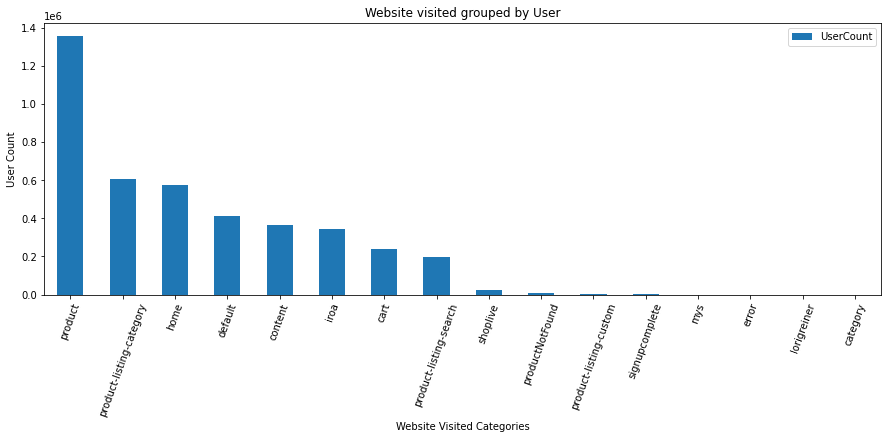

In [13]:
wb_websiteAnalysis.plot.bar(x='Website_section_visited', y='UserCount', rot=70,figsize=(15,5));
plt.title('Website visited grouped by User')
plt.xlabel('Website Visited Categories')
plt.ylabel('User Count')
plt.show;

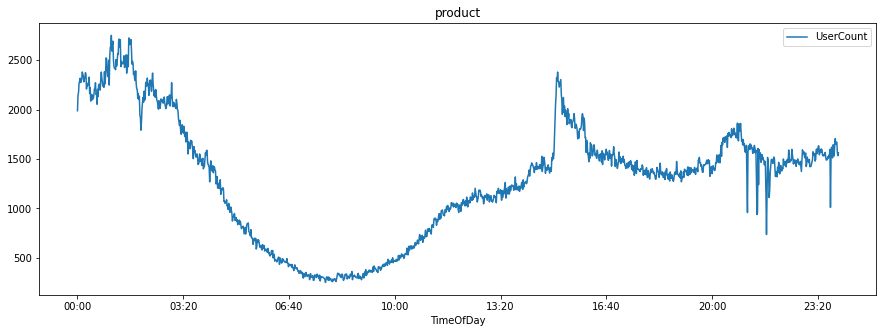

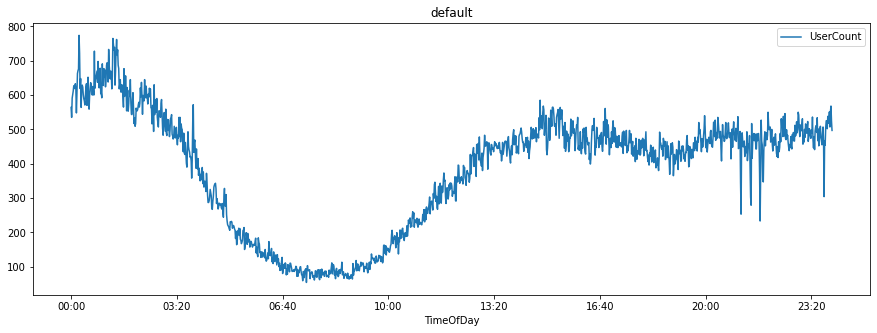

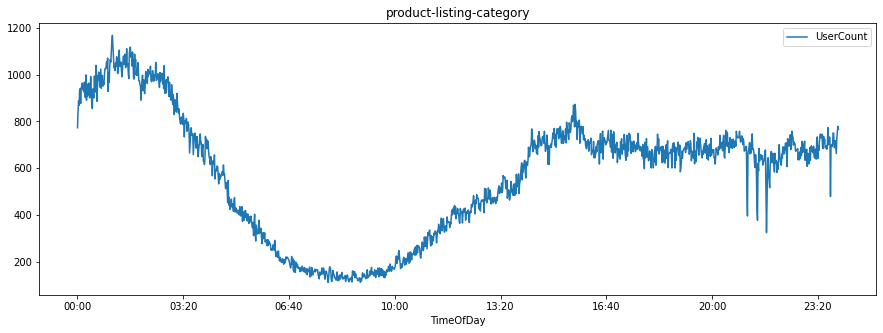

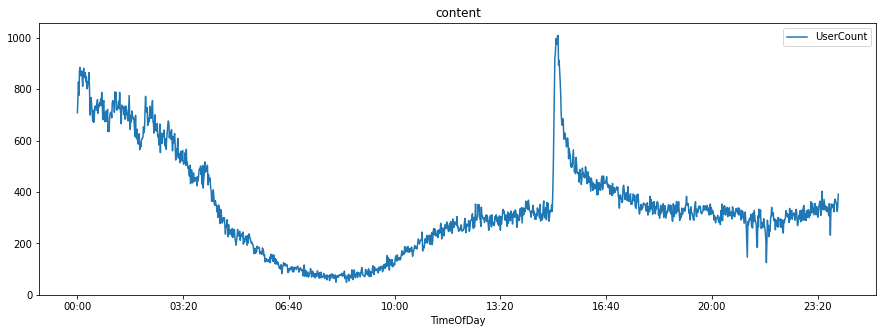

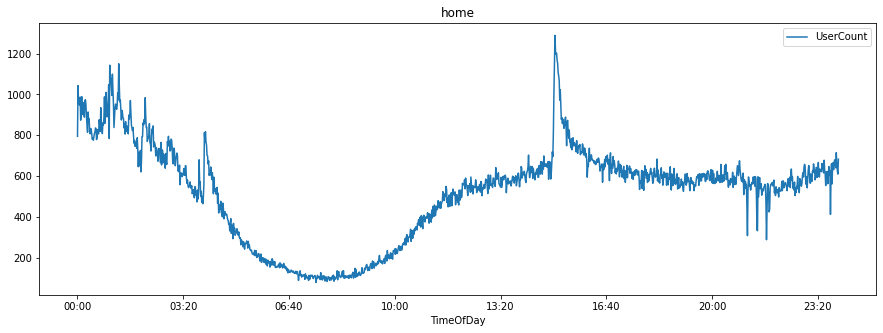

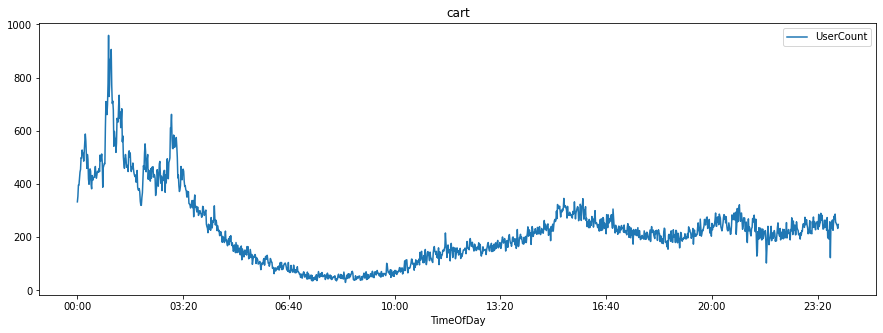

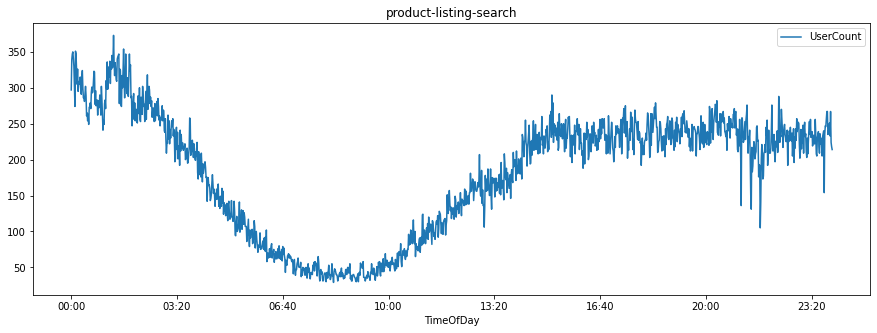

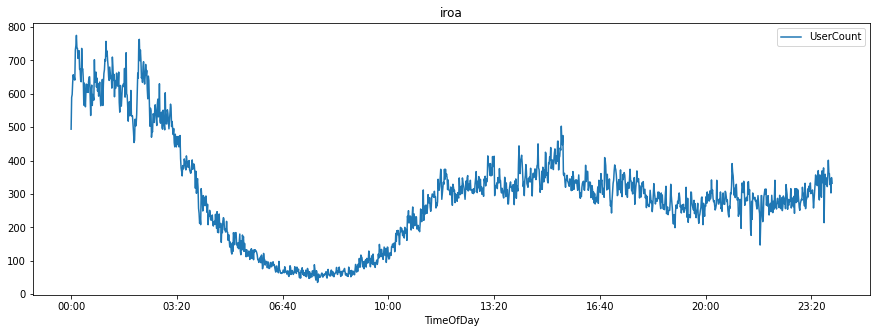

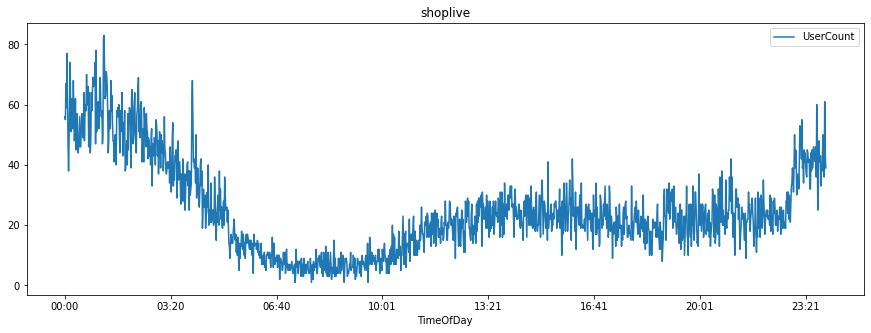

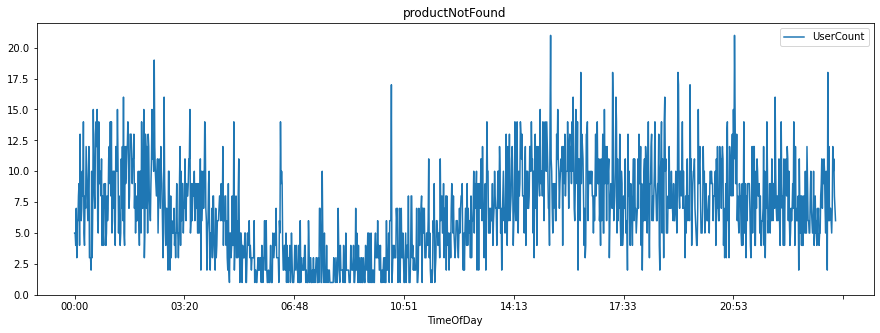

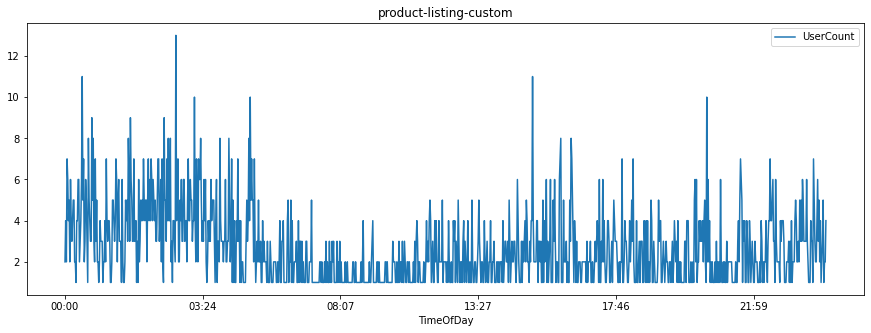

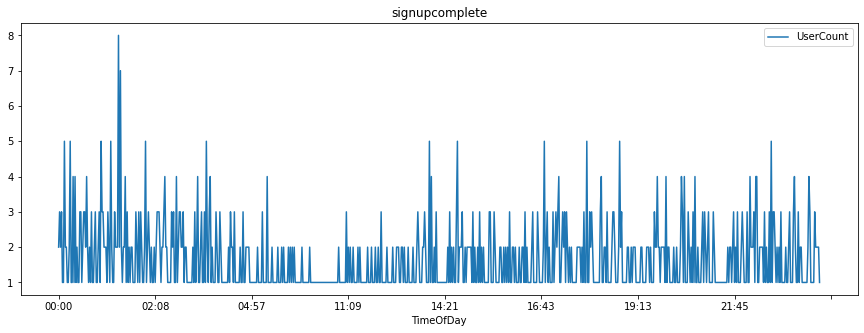

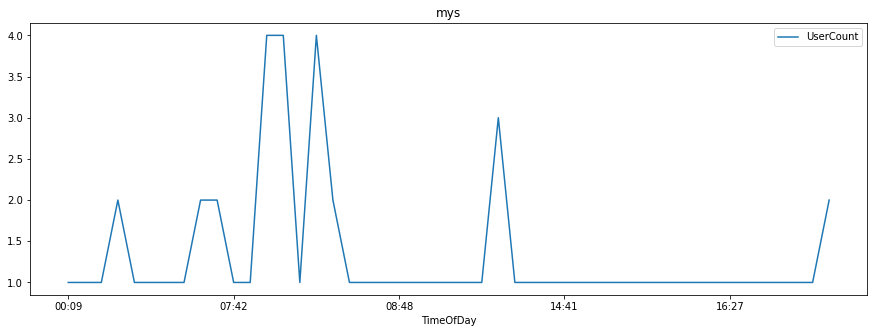

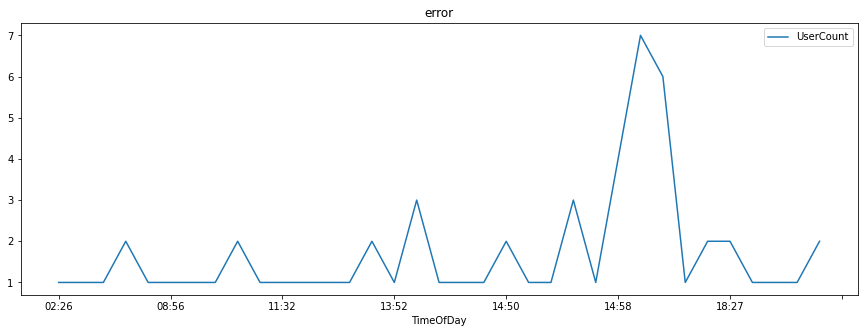

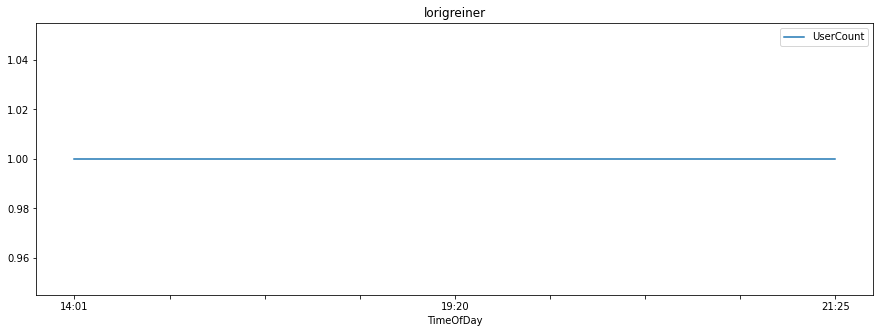

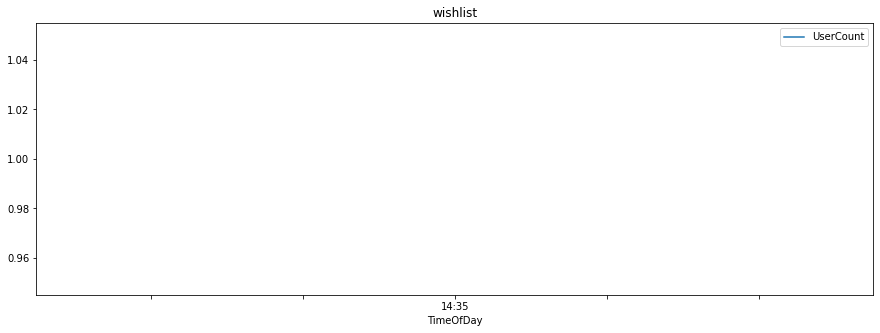

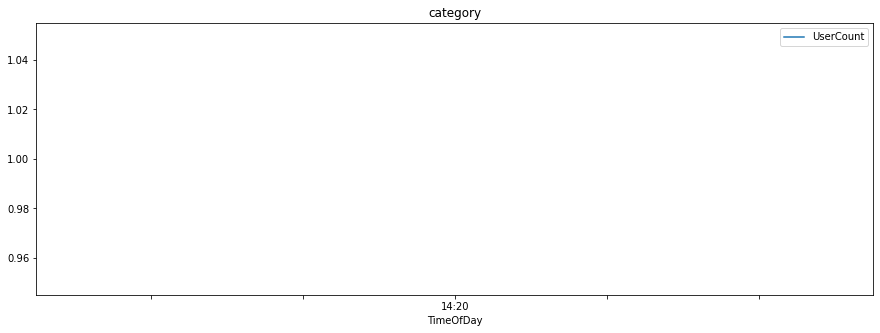

In [14]:
# All the website catagories with visited time
for i in wb_dummy.Website_section_visited.unique():
    wb_TimeAnalysis = wb_dummy[wb_dummy['Website_section_visited']==i].groupby('TimeOfDay')['Timestamp'].count().reset_index().rename(columns={'Timestamp': 'UserCount'})
    wb_TimeAnalysis.plot(x='TimeOfDay',y='UserCount',figsize=(15,5),title = i )

### 2.4 Count the Website visited by User 

In [15]:
# Count the website visited by user
wb_dummy.groupby('UserID')['Website_section_visited'].value_counts().sort_values(ascending = False).head(20)

UserID               Website_section_visited 
0                    product                     498322
                     product-listing-category    215841
                     home                        179270
                     default                     141906
                     content                     124665
                     iroa                         86002
                     cart                         84318
                     product-listing-search       64991
                     shoplive                      9471
3077341700699443780  iroa                          3098
0                    productNotFound               1960
                     product-listing-custom         839
7190685980615725949  product                        743
1215902060999829238  iroa                           696
7188604889406730572  default                        544
129240170177055445   default                        445
4965664608417110187  default                        401
73

## 3. Analysis the final conversions csv file

In [16]:
# Read the final conversions file using pandas
fc = pd.read_csv('Problem2_FInalConversions.csv', sep = '\t', header = None)
fc.columns = ['Timestamp', 'UserID','ProductCode', 'CartValue']

In [17]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79795 entries, 0 to 79794
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    79795 non-null  object 
 1   UserID       79795 non-null  int64  
 2   ProductCode  79795 non-null  object 
 3   CartValue    79795 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [18]:
fc.isnull().sum()

Timestamp      0
UserID         0
ProductCode    0
CartValue      0
dtype: int64

### 3.1 Analysis the final conversions file

In [19]:
# copy the dummy dataframe for analysis 
fc_dummy = fc.copy()

In [20]:
# Add a new column for guest user purchased
fc_dummy['isGuest'] = fc_dummy['UserID'].apply(lambda f: f <= 0 )

In [21]:
fc.head()

,Timestamp,UserID,ProductCode,CartValue
0,2017-07-26 00:00:10.465,0,A293532,52.14
1,2017-07-26 00:00:12.301,0,H209597,31.50
2,2017-07-26 00:00:12.388,0,H211370,30.48
3,2017-07-26 00:00:14.389,0,A282331,51.00
4,2017-07-26 00:00:16.837,0,H211410,16.74


In [22]:
# Guest user and normal user
print('Total rows & columns : ',fc_dummy.shape)
print('Total users : ', len(fc_dummy.UserID.unique()))

fcuser = pd.DataFrame()
fcuser['count'] = fc_dummy.groupby('isGuest').size()
fcuser['percentile']= fcuser['count'].apply(lambda x:x/len(fc_dummy)*100)
fcuser

Total rows & columns :  (79795, 5)
Total users :  41009


,count,percentile
isGuest,,
False,59598,74.68889
True,20197,25.31111


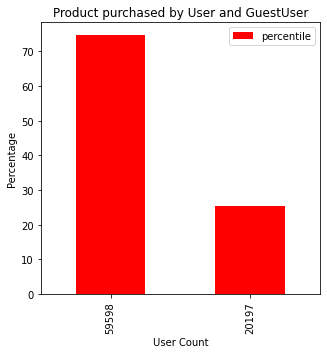

In [23]:

fcuser.plot.bar(x='count', y='percentile',figsize=(5,5),color= 'r');
plt.ylabel('Percentage')
plt.xlabel('User Count')
plt.title('Product purchased by User and GuestUser')
plt.show();

In [24]:
# Added the new column for time
fc_dummy['TimeOfDay'] = fc_dummy['Timestamp'].apply(lambda x:str(x)[11:16])
fc_dummy.sample(5)

,Timestamp,UserID,ProductCode,CartValue,isGuest,TimeOfDay
12313,2017-07-26 03:46:27.462,0,"A287738,A292203,A286591,A292203,A282644,A286591",165.56,True,03:46
63173,2017-07-26 15:46:01.707,7952516374559459021,"A277917,A277917",55.12,False,15:46
46778,2017-07-26 20:00:40.294,0,K45766,89.96,True,20:00
63330,2017-07-26 12:23:09.911,2909490796657262709,A299297,52.14,False,12:23
63641,2017-07-26 12:44:52.51,0,A280999,81.84,True,12:44


### 3.2 User Count for each product by Guest User and Registered User

#### 3.2.1 Guest User for each product

In [25]:
# Guest User Analysis with each product
fc_GuestAnalysis = fc_dummy[fc_dummy['isGuest']==True].groupby('ProductCode')['Timestamp'].count().reset_index().rename(columns={'Timestamp': 'UserCount'})
fc_GuestAnalysis['Percentile']= fc_GuestAnalysis['UserCount'].apply(lambda x:x/len(fc_dummy)*100)
fc_GuestAnalysis = fc_GuestAnalysis.sort_values('UserCount',ascending=False)
fc_GuestAnalysis.head()

,ProductCode,UserCount,Percentile
1651,A293532,1640,2.055267
2856,H211394,1439,1.803371
3740,K45766,1438,1.802118
2849,H211370,1226,1.536437
2860,H211397,423,0.530108


#### 3.2.2. Registered User for each product

In [26]:
# Registered User analysis with product
fc_NonGuestAnalysis = fc_dummy[fc_dummy['isGuest']==False].groupby('ProductCode')['Timestamp'].count().reset_index().rename(columns={'Timestamp': 'UserCount'})
fc_NonGuestAnalysis['Percentile']= fc_NonGuestAnalysis['UserCount'].apply(lambda x:x/len(fc_dummy)*100)
fc_NonGuestAnalysis = fc_NonGuestAnalysis.sort_values('UserCount',ascending=False)
fc_NonGuestAnalysis.head()

,ProductCode,UserCount,Percentile
9654,K45766,4756,5.960273
7409,H211394,3729,4.673225
7397,H211370,3694,4.629363
4252,A293532,3158,3.957641
7413,H211397,1011,1.266997


### 3.3 Top Selling Product 

#### 3.3.1 Top selling product by Registered user

In [27]:
# Top Selling product
fc_NonGuestTopProduct =fc_NonGuestAnalysis.iloc[:10]
fc_NonGuestTopProduct

,ProductCode,UserCount,Percentile
9654,K45766,4756,5.960273
7409,H211394,3729,4.673225
7397,H211370,3694,4.629363
4252,A293532,3158,3.957641
7413,H211397,1011,1.266997
5053,A302728,986,1.235666
4864,A299297,935,1.171753
6339,H205246,880,1.102826
7884,H211939,786,0.985024
9284,K41372,710,0.889780


#### 3.3.2 Top selling product by Guest user

In [28]:
# Top Selling Product
fc_GuestTopProduct =fc_GuestAnalysis.iloc[:5]
fc_GuestTopProduct

,ProductCode,UserCount,Percentile
1651,A293532,1640,2.055267
2856,H211394,1439,1.803371
3740,K45766,1438,1.802118
2849,H211370,1226,1.536437
2860,H211397,423,0.530108


## 4. Feature Engineering (Variable Imputation)

In [29]:
# Create Dummies for website section visited column
dummies = pd.get_dummies(wb.Website_section_visited)
dummies

,cart,category,content,default,error,home,iroa,lorigreiner,mys,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete,wishlist
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5535919,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5535920,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5535921,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5535922,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### 4.1 Dummies added to wb dataframe

In [30]:
# Drop the column if exists
if 'Timestamp' in wb.columns:
    wb.drop('Timestamp',axis = 1, inplace=True)
if 'Website_section_visited' in wb.columns:
    wb.drop('Website_section_visited',axis = 1, inplace=True)

In [31]:
# concat the two dataframe
wb_tmp = pd.concat([wb, dummies], axis= 'columns')

In [32]:
# groupby and sum the column using UserID column
wb_tmp = wb_tmp.groupby('UserID').sum().reset_index()

In [33]:
wb_tmp

,UserID,cart,category,content,default,error,home,iroa,lorigreiner,mys,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete,wishlist
0,0,84318.0,0.0,124665.0,141906.0,33.0,179270.0,86002.0,1.0,0.0,498322.0,215841.0,839.0,64991.0,1960.0,9471.0,259.0,1.0
1,2,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,342391,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,420372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516927,9223331925947099393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
516928,9223332159306941752,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
516929,9223343967635174542,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
516930,9223348075878229938,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4.2 Dummies added to fc dataframe

In [34]:
# Drop the column if exists
if 'Timestamp' in fc.columns:
    fc.drop('Timestamp',axis = 1, inplace=True)
if 'ProductCode' in wb.columns:
    wb.drop('ProductCode',axis = 1, inplace=True)

In [35]:
# groupby and sum the column using UserID column
fc_tmp = fc.groupby('UserID').sum().reset_index()
fc_tmp

,UserID,CartValue
0,0,1375101.66
1,2941287703,75.34
2,71023925710020,89.96
3,394529638495081,94.34
4,430191686443660,84.70
...,...,...
41004,9222344977727669611,89.96
41005,9222827786235385211,292.00
41006,9222849861047010228,64.40
41007,9223093682582171386,144.96


### 4.3 Merging the wb and fc dataframe

In [36]:
# Merge the both dataframe using right merge operation
df = pd.merge(fc_tmp, wb_tmp ,on='UserID',how='right')
df = df.fillna(0)
df['isPurchased'] = df['CartValue'].apply(lambda x : 1 if x > 0 else 0)
df

,UserID,CartValue,cart,category,content,default,error,home,iroa,lorigreiner,mys,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete,wishlist,isPurchased
0,0,1375101.66,84318.0,0.0,124665.0,141906.0,33.0,179270.0,86002.0,1.0,0.0,498322.0,215841.0,839.0,64991.0,1960.0,9471.0,259.0,1.0,1
1,2,0.00,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,342391,0.00,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,420372,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516927,9223331925947099393,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
516928,9223332159306941752,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0
516929,9223343967635174542,0.00,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
516930,9223348075878229938,0.00,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [37]:
# describe the final dataframe
df.describe()

,UserID,CartValue,cart,category,content,default,error,home,iroa,lorigreiner,mys,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete,wishlist,isPurchased
count,5.169320e+05,5.169320e+05,516932.000000,516932.000000,516932.000000,516932.000000,516932.000000,516932.000000,516932.000000,516932.000000,516932.000000,516932.000000,516932.000000,516932.000000,516932.000000,516932.000000,516932.000000,516932.000000,516932.000000,516932.000000
mean,4.615271e+18,1.074263e+01,0.625469,0.000002,0.945722,1.067887,0.000116,1.454977,0.828923,0.000006,0.000122,3.589795,1.592792,0.005745,0.507767,0.018055,0.069274,0.002538,0.000002,0.079032
std,2.664731e+18,1.913452e+03,117.293761,0.001391,173.403934,197.424677,0.047534,249.343670,119.725945,0.002409,0.035650,693.114364,300.218301,1.175870,90.404797,2.733055,13.178986,0.363195,0.001391,0.269788
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.309821e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.619038e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.927872e+18,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.223368e+18,1.375102e+06,84318.000000,1.000000,124665.000000,141906.000000,33.000000,179270.000000,86002.000000,1.000000,22.000000,498322.000000,215841.000000,839.000000,64991.000000,1960.000000,9471.000000,259.000000,1.000000,1.000000


In [38]:
df[(df['isPurchased']==1)]
for c in df.columns:
    if c not in ['UserID','isPurchased']:
        df.loc[0,c]=df.loc[0,c]/1407879
df

,UserID,CartValue,cart,category,content,default,error,home,iroa,lorigreiner,mys,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete,wishlist,isPurchased
0,0,0.976719,0.05989,0.0,0.088548,0.100794,0.000023,0.127333,0.061086,7.102883e-07,0.0,0.353952,0.153309,0.000596,0.046162,0.001392,0.006727,0.000184,7.102883e-07,1
1,2,0.000000,0.00000,0.0,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.0,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0
2,5,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0
3,342391,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000e+00,0.0,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0
4,420372,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516927,9223331925947099393,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0
516928,9223332159306941752,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.0,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0
516929,9223343967635174542,0.000000,0.00000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.0,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0
516930,9223348075878229938,0.000000,0.00000,0.0,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000e+00,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0


In [39]:
# Analysis the isPurchased column
df_purchased = pd.DataFrame()
df_purchased['count'] = df.groupby('isPurchased').size()
df_purchased['percentile']= df_purchased['count'].apply(lambda x:x/len(df)*100)
df_purchased

,count,percentile
isPurchased,,
0,476078,92.096833
1,40854,7.903167


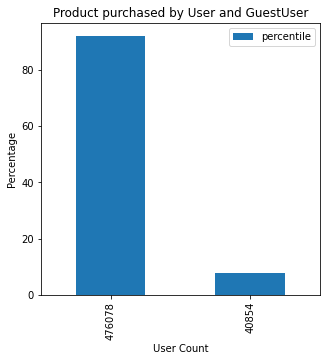

In [40]:
# Analysis the isPurchased column using histogram
df_purchased.plot.bar(x='count', y='percentile',figsize=(5,5));
plt.ylabel('Percentage')
plt.xlabel('User Count')
plt.title('Product purchased by User and GuestUser')
plt.show();

In [41]:
# correletion method
df.corr()

,UserID,CartValue,cart,category,content,default,error,home,iroa,lorigreiner,mys,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete,wishlist,isPurchased
UserID,1.000000,0.000496,0.001030,-0.000291,-0.000452,0.000544,-0.001963,-0.000397,-0.000482,0.000366,0.002322,0.000386,-0.000290,-0.000710,-0.002260,0.001618,-0.001374,0.001429,-0.002409,-0.001590
CartValue,0.000496,1.000000,0.285697,-0.000193,0.069498,0.034680,0.002372,0.132871,0.030789,-0.000272,0.002407,0.175239,0.090523,0.005236,0.071667,0.017319,0.018185,0.041982,-0.000169,0.472868
cart,0.001030,0.285697,1.000000,-0.000298,0.207541,0.074184,0.001631,0.264422,0.074554,-0.000421,0.003236,0.500823,0.223197,0.031484,0.183830,0.046715,0.055490,0.034565,-0.000259,0.357307
category,-0.000291,-0.000193,-0.000298,1.000000,-0.000455,-0.000238,-0.000006,-0.000905,-0.000179,-0.000003,-0.000005,-0.000660,-0.000537,-0.000040,-0.000361,-0.000102,-0.000175,-0.000061,-0.000002,-0.000407
content,-0.000452,0.069498,0.207541,-0.000455,1.000000,0.061666,-0.000800,0.272631,0.063538,-0.000643,-0.000312,0.364407,0.247869,0.055835,0.109179,0.023138,0.056468,0.014532,-0.000397,0.112201
default,0.000544,0.034680,0.074184,-0.000238,0.061666,1.000000,-0.000419,0.150021,0.036533,-0.000337,0.001557,0.099109,0.040543,0.003186,0.040061,0.024829,0.042614,0.005590,-0.000208,0.055109
error,-0.001963,0.002372,0.001631,-0.000006,-0.000800,-0.000419,1.000000,0.003408,-0.000545,-0.000008,0.004375,-0.000025,-0.000141,-0.000120,-0.000459,0.008503,0.000628,-0.000186,-0.000003,-0.000078
home,-0.000397,0.132871,0.264422,-0.000905,0.272631,0.150021,0.003408,1.000000,0.124905,-0.001280,0.007305,0.417723,0.238069,0.018538,0.201333,0.062929,0.120682,0.012491,-0.000801,0.226746
iroa,-0.000482,0.030789,0.074554,-0.000179,0.063538,0.036533,-0.000545,0.124905,1.000000,-0.000254,-0.000399,0.132763,0.030207,0.005929,0.028690,0.010632,0.049045,-0.003633,-0.000163,0.057793
lorigreiner,0.000366,-0.000272,-0.000421,-0.000003,-0.000643,-0.000337,-0.000008,-0.001280,-0.000254,1.000000,-0.000007,-0.000934,-0.000437,-0.000056,-0.000511,-0.000144,-0.000247,-0.000087,-0.000002,-0.000576


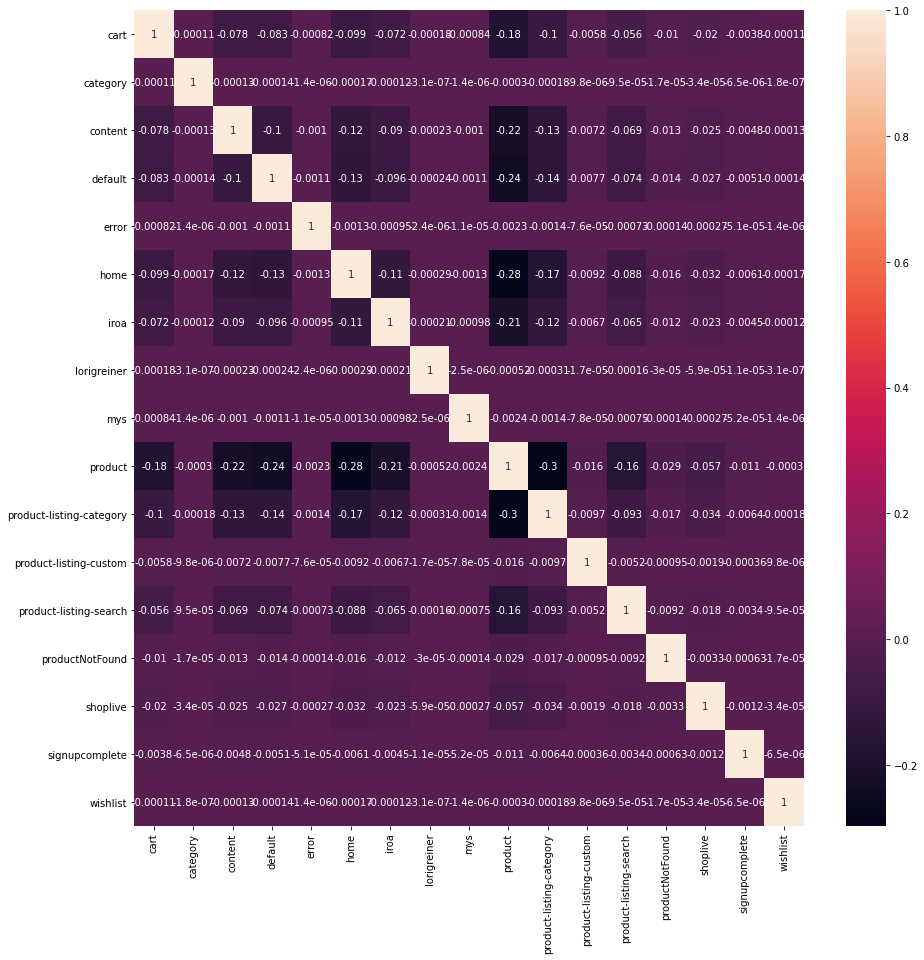

In [42]:
# Heatmap
f, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(dummies.corr(), annot=True);

#### Most user visited pages only picked for analysis

In [43]:
# X = df.drop('isPurchased',axis = 'columns')
X = df.loc[:,[
    'product',
    'product-listing-category',
    'home',
    'default',
    'content',
    'iroa',
    'cart',
    'product-listing-search'
]]
y = df.isPurchased

In [44]:
X

,product,product-listing-category,home,default,content,iroa,cart,product-listing-search
0,0.353952,0.153309,0.127333,0.100794,0.088548,0.061086,0.05989,0.046162
1,6.000000,1.000000,1.000000,1.000000,6.000000,0.000000,0.00000,0.000000
2,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...
516927,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
516928,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
516929,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000
516930,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.00000,0.000000


## 5. Model Selection Criteria (Basis of choosing the final Technique)

### 5.1 Train Test the model

In [45]:
# Train Test Split method
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state= 0)

print(X.shape,X_train.shape,X_test.shape)

(516932, 8) (387699, 8) (129233, 8)


### 5.2 Apply the Standard Scaler method

In [46]:
# Apply Standard Scaler method
sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)

## 6. Measurement Criteria (Comparison of Various Models)

### 6.1 Logistics Regression

In [47]:
# Create a new object for logistic Regression
lm = LogisticRegression()

In [48]:
# fit model
lm.fit(X_train, y_train)

LogisticRegression()

In [49]:
# print the accuracy score logistic regression
print('Accuracy score of the training data : ', lm.score(X_test,y_test))

Accuracy score of the training data :  0.923634056316885


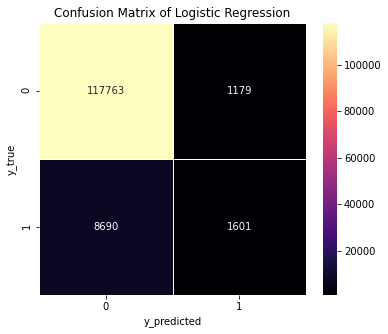

In [50]:
# Confusion Matrix of Logistic Regression
cm_lr = confusion_matrix(y_test,lm.predict(X_test))

f, ax = plt.subplots(figsize = (6,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax, cmap='magma')
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

### 6.2 Support Vector Machine Classifier

In [51]:
#svc = svm.SVC(kernel='linear')

In [52]:
#svc.fit(X_train,y_train)

In [53]:
# X_train_prediction = svc.predict(X_train)
# training_data_accuray = accuracy_score(X_train_prediction,y_train)

In [54]:
# print('Accuracy on training data : ', training_data_accuray)

In [55]:
# cm_lr = confusion_matrix(y_test,svc.predict(X_test))

# f, ax = plt.subplots(figsize = (6,5))
# sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax, cmap='magma')
# plt.xlabel("y_predicted")
# plt.ylabel("y_true")
# plt.title("Confusion Matrix of SVM Regression")
# plt.show()

### 6.3 Decision Tree Classifier

In [56]:
# Create a object for DecisionTreeClassifier and fit the model
dt = DecisionTreeClassifier(max_depth = 4, random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [57]:
# Score the decision tree model
dt.score(X_test, y_test)

0.9303196551964281

In [58]:
# Print the model
print('Accuracy score of the training data : ', dt.score(X_test,y_test))

Accuracy score of the training data :  0.9303196551964281


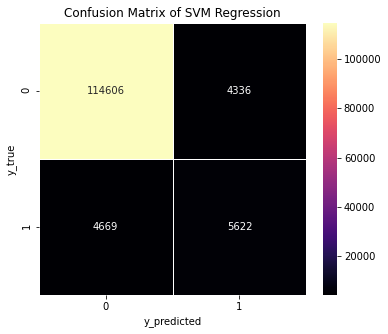

In [59]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test,dt.predict(X_test))

f, ax = plt.subplots(figsize = (6,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax, cmap='magma')
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of SVM Regression")
plt.show()

## 6.4 Checking Probability
### lm.predict_proba([[ 'product', 'product-listing-category', 'home', 'default', 'content', 'iroa', 'cart', 'product-listing-search' ]])

In [60]:
# Checking the probabilty using selected columns in logistic regression
lm.predict_proba([[30,34,9,9,9,3,3,0]])

array([[0.03684908, 0.96315092]])

### dt.predict_proba([[ 'product', 'product-listing-category', 'home', 'default', 'content', 'iroa', 'cart', 'product-listing-search' ]])

In [61]:
# Checking the probabilty using selected columns in decisionTree
dt.predict_proba([[30,34,9,9,9,3,3,0]])

array([[0.46305617, 0.53694383]])

## 7. Scope for improvement

In [62]:
# Roc Curve
from sklearn.metrics import roc_auc_score, roc_curve

In [63]:
Log_ROC_aur = roc_auc_score(y,lm.predict(X))
fpr,tpr, thresholds = roc_curve(y, lm.predict_proba(X) [:,1])

Text(0, 0.5, 'True Positive Rate')

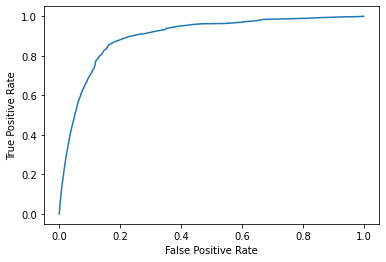

In [64]:
plt.figure()
plt.plot(fpr,tpr, label = 'Logit Model 1 (area = %0.2f' % Log_ROC_aur)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [65]:
X2 = df.loc[:,[
    'CartValue',
    'product',
    'product-listing-category',
    'home',
]]
y2 = df.isPurchased

In [66]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2, test_size= 0.25, random_state= 0)

print(X2.shape,X2_train.shape,X2_test.shape)

(516932, 4) (387699, 4) (129233, 4)


In [67]:
lm2 = LogisticRegression()
lm2.fit(X2_train, y2_train)

LogisticRegression()

In [68]:
print('Accuracy score of the training data : ', lm2.score(X2_test,y2_test))

Accuracy score of the training data :  1.0


In [69]:
Log_ROC_aur2 = roc_auc_score(y2,lm2.predict(X2))
fpr2,tpr2, thresholds2 = roc_curve(y2, lm2.predict_proba(X2) [:,1])

Text(0, 0.5, 'True Positive Rate')

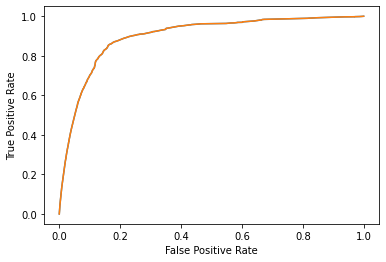

In [70]:
plt.figure()
plt.plot(fpr,tpr, label = 'Logit Model 1 (area = %0.2f' % Log_ROC_aur)
plt.plot(fpr,tpr, label = 'Logit Model 2 (area = %0.2f' % Log_ROC_aur2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## 8. Save model to File using pickle

### 8.1 Save model

In [71]:
# Save the logistic model using pickle
with open('logistic_model', 'wb') as f:
    pickle.dump(lm,f)

In [72]:
# Save the decision model using pickle
with open('DecisionTree_model', 'wb') as f:
    pickle.dump(dt,f)

### 8.2 Load model

In [73]:
# Load the logistic model using pickel
with open('logistic_model', 'rb') as f:
    logistic_model = pickle.load(f)

In [74]:
# Load the decisiontree model using pickel
with open('DecisionTree_model', 'rb') as f:
    DecisionTree_model = pickle.load(f)

### 8.3 Checking model probability

#### 8.3.1 Logistic Model

In [75]:
# Checking Probability Logistic model
lm.predict_proba([[9,1,1,1,1,1,1,1]])

array([[0.62748475, 0.37251525]])

In [76]:
logistic_model.predict_proba([[9,1,1,1,1,1,1,1]])

array([[0.62748475, 0.37251525]])

#### 8.3.1 Decision Model

In [77]:
# Checking Probability decision tree model
dt.predict_proba([[9,1,1,1,1,1,1,1]])

array([[0.46305617, 0.53694383]])

In [78]:
DecisionTree_model.predict_proba([[9,1,1,1,1,1,1,1]])

array([[0.46305617, 0.53694383]])